In [2]:
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta
from data import (
    database,
    CHOICE,
    SM_AV,
    CAR_AV_SP,
    TRAIN_AV_SP,
    TRAIN_TT_SCALED,
    TRAIN_COST_SCALED,
    SM_TT_SCALED,
    SM_COST_SCALED,
    CAR_TT_SCALED,
    CAR_CO_SCALED,
    INCOME,
)

# Parameters to be estimated
ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_TRAIN = Beta('ASC_TRAIN', 0, None, None, 0)
ASC_SM = Beta('ASC_SM', 0, None, None, 1)
B_TIME = Beta('B_TIME', 0, None, None, 0)
B_COST = Beta('B_COST', 0, None, None, 0)
B_INCOME = Beta('B_INCOME', 0, None, None, 0)


# Definition of the utility functions
V1 = ASC_TRAIN + B_TIME * TRAIN_TT_SCALED + B_COST * TRAIN_COST_SCALED + B_INCOME * INCOME
V2 = ASC_SM + B_TIME * SM_TT_SCALED + B_COST * SM_COST_SCALED + B_INCOME * INCOME
V3 = ASC_CAR + B_TIME * CAR_TT_SCALED + B_COST * CAR_CO_SCALED + B_INCOME * INCOME

# Associate utility functions with the numbering of alternatives
V = {1: V1, 2: V2, 3: V3}

# Associate the availability conditions with the alternatives
av = {1: TRAIN_AV_SP, 2: SM_AV, 3: CAR_AV_SP}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
logprob = models.loglogit(V, av, CHOICE)

# Create the Biogeme object
the_biogeme = bio.BIOGEME(database, logprob)
the_biogeme.modelName = 'logit'

# Calculate the null log likelihood for reporting.
the_biogeme.calculateNullLoglikelihood(av)

# Estimate the parameters
results = the_biogeme.estimate()
print(results.short_summary())

# Get the results in a pandas table
pandas_results = results.getEstimatedParameters()
print(pandas_results)


Results for model logit
Nbr of parameters:		5
Sample size:			6768
Excluded data:			3960
Null log likelihood:		-6964.663
Final log likelihood:		-5331.252
Likelihood ratio test (null):		3266.822
Rho square (null):			0.235
Rho bar square (null):			0.234
Akaike Information Criterion:	10672.5
Bayesian Information Criterion:	10706.6

                  Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_CAR   -1.546327e-01  5.816342e-02    -2.658590      0.007847
ASC_TRAIN -7.011873e-01  8.256201e-02    -8.492857      0.000000
B_COST    -1.083790e+00  6.822502e-02   -15.885521      0.000000
B_INCOME   4.966903e-16  2.453866e-17    20.241134      0.000000
B_TIME    -1.277859e+00  1.042544e-01   -12.257120      0.000000


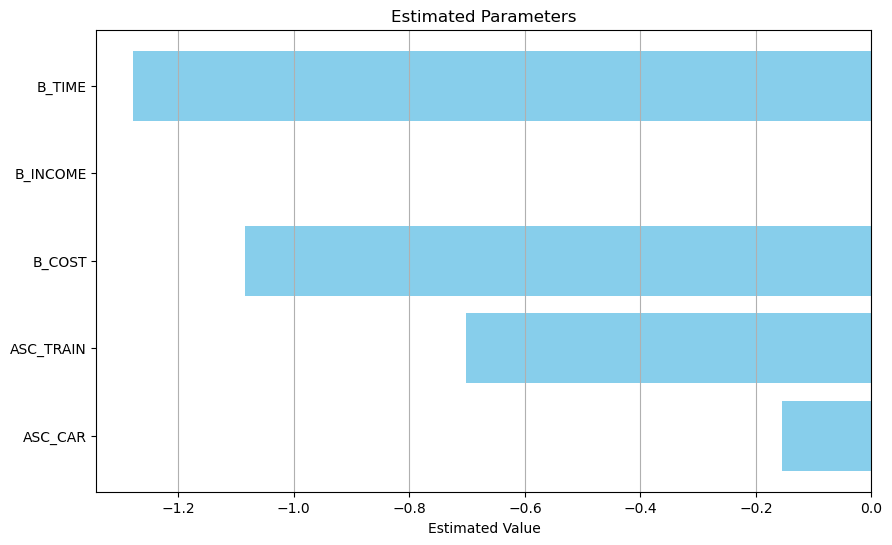

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the results
pandas_results = results.getEstimatedParameters()

# Plot 
plt.figure(figsize=(10, 6))
plt.barh(pandas_results.index, pandas_results['Value'], color='skyblue')
plt.xlabel('Estimated Value')
plt.title('Estimated Parameters')
plt.grid(axis='x')

# Display the plot
plt.show()


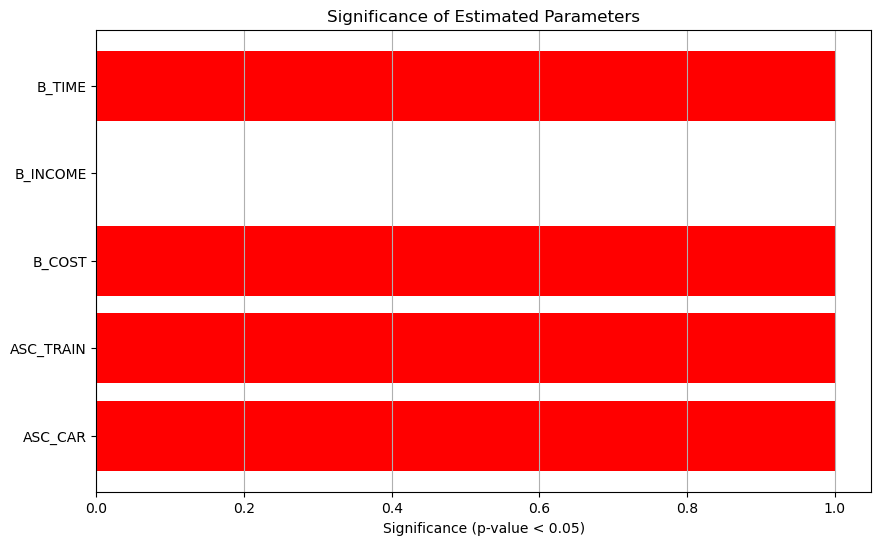

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(
    pandas_results.index,
    pandas_results['Rob. p-value'] < 0.05,
    color=['red' if p < 0.05 else 'gray' for p in pandas_results['Rob. p-value']],
)
plt.xlabel('Significance (p-value < 0.05)')
plt.title('Significance of Estimated Parameters')
plt.grid(axis='x')

# Display the plot
plt.show()
